# Don't over fit II competition

This is my EE551 individual project. It is a playground prediction competition on Kaggle.

## Exploratory Data Analysis(EDA)
### Datacollection

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [346]:
train.shape

(250, 302)

In [347]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [348]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,target
0,250,0
1,251,0
2,252,0
3,253,0
4,254,0


In [349]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [350]:
train.tail()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
245,245,0.0,-1.199,0.466,-0.908,2.771,1.631,0.931,0.182,-0.652,...,0.724,0.177,-0.039,0.759,0.461,-0.243,0.525,0.281,-0.255,-1.136
246,246,0.0,0.237,0.233,-0.380,-1.748,0.839,-0.721,-0.114,0.005,...,0.857,0.147,0.601,-0.210,-0.768,1.004,-0.979,0.007,0.112,-0.558
247,247,0.0,1.411,-1.465,0.119,0.583,1.634,-0.207,1.173,1.622,...,-0.499,-0.455,0.759,0.222,0.105,-0.727,0.461,0.760,0.168,-0.719
248,248,1.0,0.620,1.040,0.184,-0.570,-0.087,-0.748,-1.559,-0.553,...,0.557,-1.494,0.977,0.882,-1.512,0.478,-0.910,-0.805,2.029,-0.423
249,249,0.0,0.489,0.403,0.139,-2.046,1.345,0.122,1.255,0.647,...,-0.025,1.305,-1.169,1.413,0.517,0.812,0.269,-1.454,-0.625,1.474


In [351]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [352]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 589.9 KB
None


### Visualization

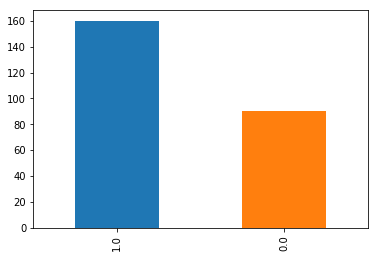

In [353]:
train['target'].value_counts().plot.bar();

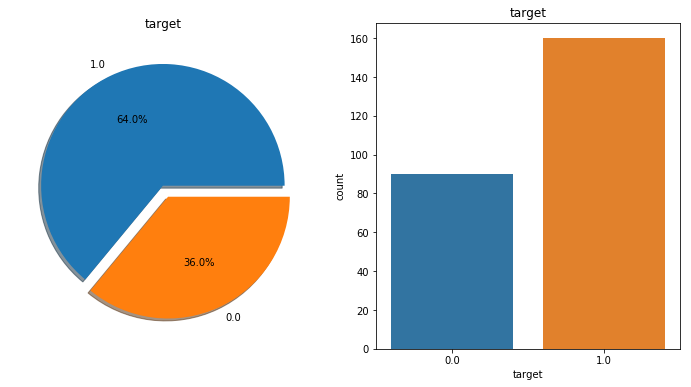

In [354]:
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(12,6))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct ='%1.1f%%',ax=ax[0],shadow = True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target', data = train, ax = ax[1])
ax[1].set_title('target')
plt.show()

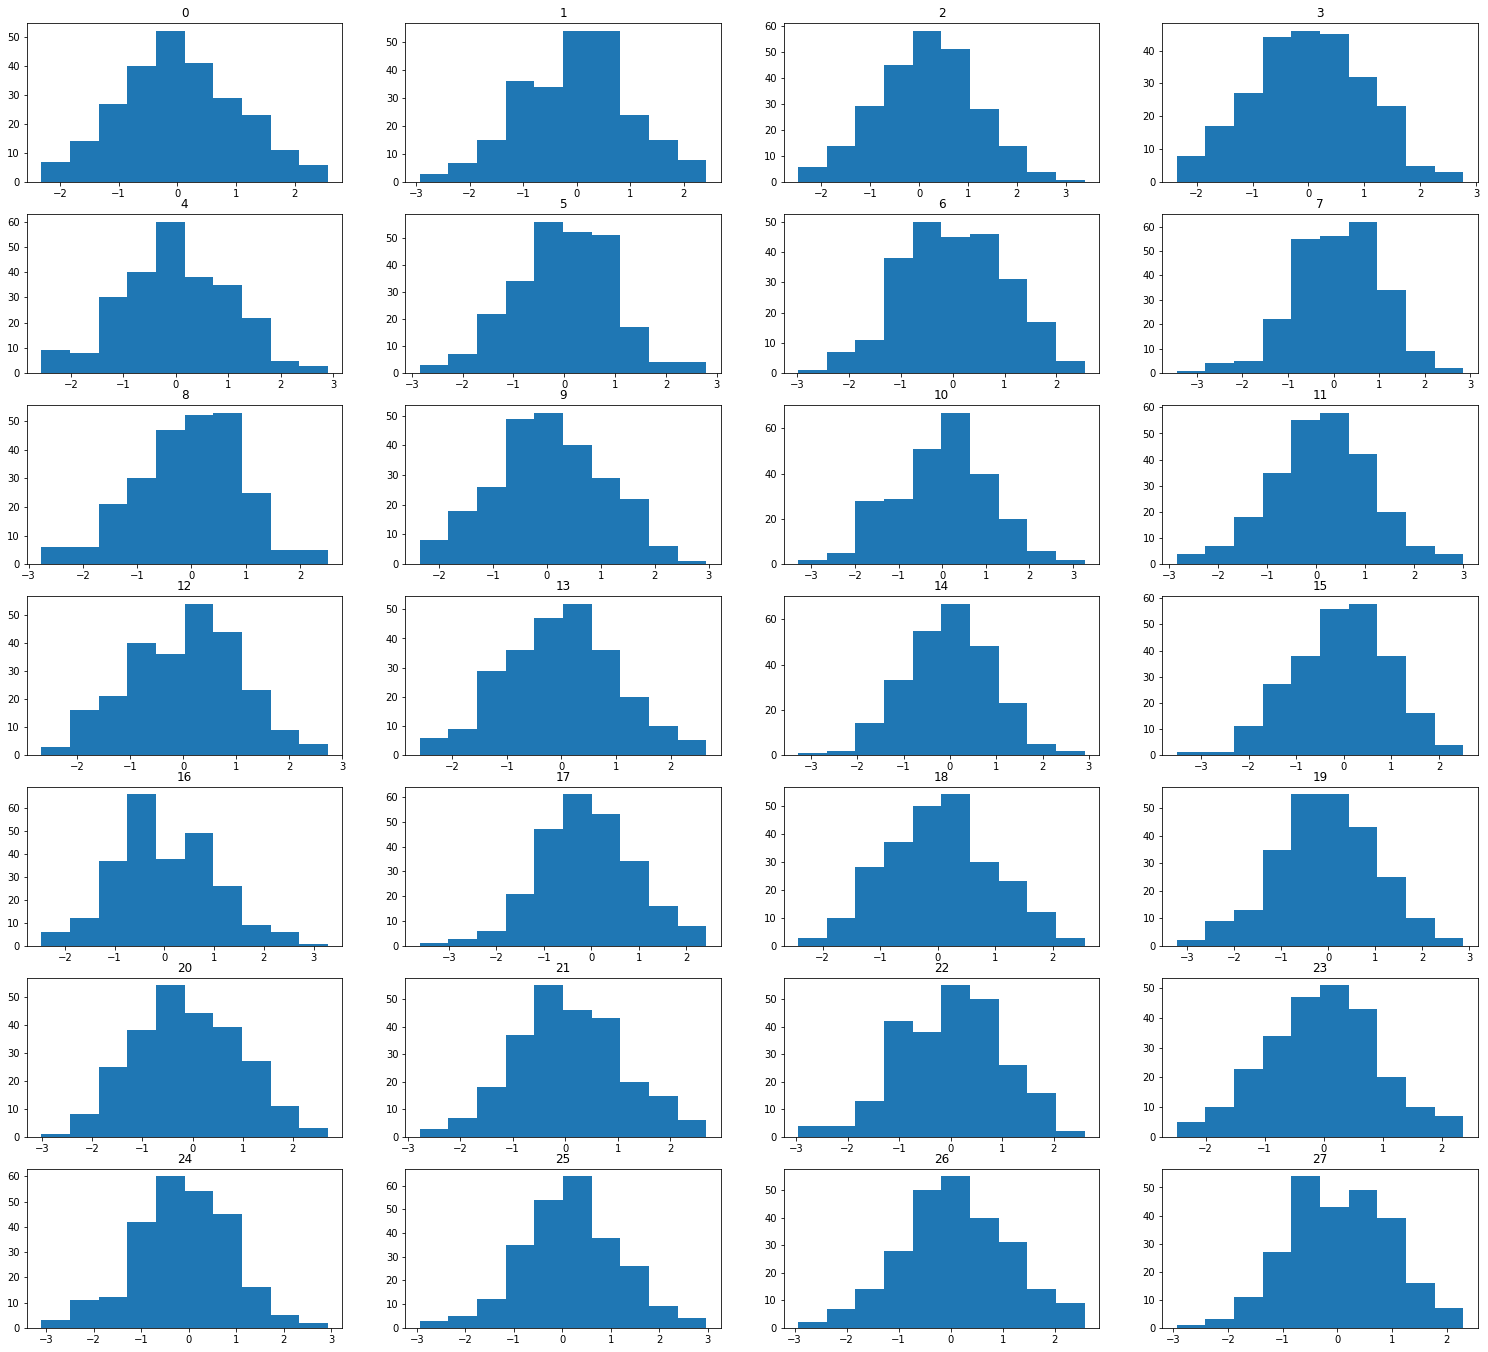

In [355]:
plt.figure(figsize = (26,24))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7, 4, i+1)
    plt.hist(train[col])
    plt.title(col)

Values in columns are more or less similar.

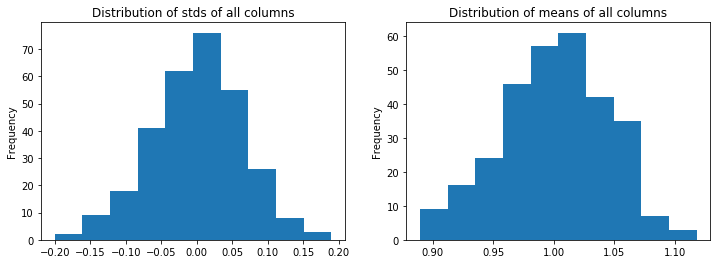

In [356]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
train[train.columns[2:]].mean().plot('hist')
plt.title('Distribution of stds of all columns')
plt.subplot(1,2,2)
train[train.columns[2:]].std().plot('hist')
plt.title('Distribution of means of all columns')
plt.show()

Columns have mean of 0 +/- 0.15 and std of 1 +/- 0.1.

In [357]:
corr = train.corr()['target'].sort_values(ascending = False)

In [358]:
corr.head(10)

target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
Name: target, dtype: float64

In [359]:
corr.tail(10)

16    -0.144267
194   -0.150384
id    -0.151498
189   -0.155956
80    -0.162558
73    -0.167557
295   -0.170501
91    -0.192536
117   -0.197496
217   -0.207215
Name: target, dtype: float64

## Logistic regression

In [360]:
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']
X_test = test.drop(['id'], axis = 1)

Find the best parameters for function 'LogisticRegression'.

In [361]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty = 'l1', random_state = 42)
params = {'solver': ['liblinear', 'saga'],
         'C': [0.001, 0.1, 1, 10, 50],
         'tol': [0.00001,  0.0001, 0.001, 0.005],
         'class_weight': ['balanced', None]}
log_gs = GridSearchCV(log, params, cv = StratifiedKFold(n_splits = 5), verbose = 1, n_jobs = -1, scoring = 'roc_auc')

log_gs.fit(X_train, y_train)

log_best = log_gs.best_estimator_

print(log_best)
print(log_gs.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=1e-05, verbose=0, warm_start=False)
0.8177083333333334


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Define a function to plot learning curve.

In [362]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv = cv, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha = 0.1,color = 'r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha = 0.1,color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r',label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g',label = "Cross_validation score")
    plt.legend(loc = 'best')
    return plt


Plot the learning curve of log_best.

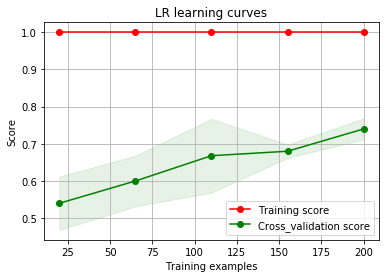

In [363]:
learningCurve = plot_learning_curve(log_best, "LR learning curves",X_train, y_train, cv = StratifiedKFold(n_splits = 5))

Define a function to draw roc curve.

In [364]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scipy import interp
def plot_roc(clf, X = X_train, y = y_train, n = 6):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 0
    classifier = clf
    cv = StratifiedKFold(n_splits = n)
    for train, test in cv.split(X,y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr,tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw = 1, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle = '--', lw =2, color = 'r', label = 'Chance', alpha =.8)
    mean_tpr = np.mean(tprs, axis = 0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color = 'b', label = r'Mean ROC(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw =2, alpha = .8)
    std_tpr = np.std(tprs, axis = 0)
    tprs_upper = np.minimum(mean_tpr + std_tpr,1)
    tprs_lower = np.maximum(mean_tpr - std_tpr,0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color ='grey', alpha = 0.2, label = r'$\pm$ 1 std. dev.')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
                 
                 

Plot the roc curve of log_best.

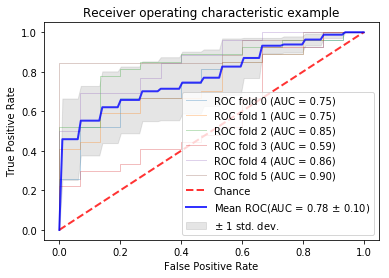

In [365]:
roc = plot_roc(log_best)

cv_score is far away from training score. It is overfitting. C is responsible for level of regularization and the smaller it is, the bigger the level of regularization it is. 
First try C = 0.1

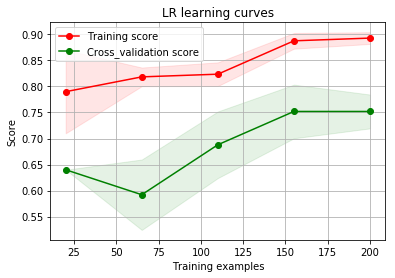

In [366]:
log_p0 = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.1, solver = 'saga', random_state = 42)
learningCurve0 = plot_learning_curve(log_p0, "LR learning curves", X_train, y_train, cv = StratifiedKFold(n_splits = 5))


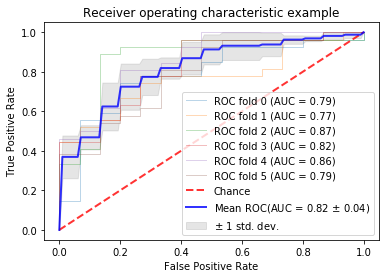

In [367]:
roc0 = plot_roc(log_p0)

Try C = 0.05.

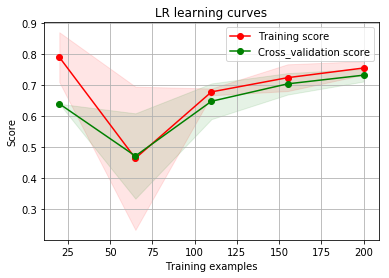

In [368]:
log_p1 = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.05, solver = 'saga', random_state = 42)
learningCurve1 = plot_learning_curve(log_p1, "LR learning curves", X_train, y_train, cv = StratifiedKFold(n_splits = 5))


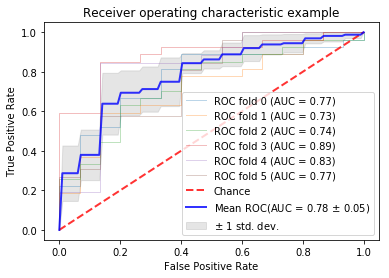

In [369]:
roc1 = plot_roc(log_p1)

Try C = 0.15.

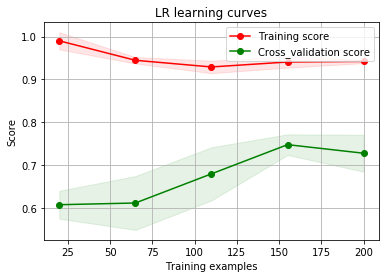

In [370]:
log_p2 = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.15, solver = 'saga', random_state = 42)
learningCurve2 = plot_learning_curve(log_p2, "LR learning curves", X_train, y_train, cv = StratifiedKFold(n_splits = 5))


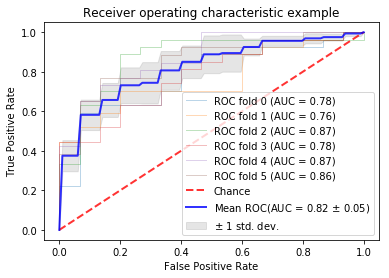

In [371]:
roc2 = plot_roc(log_p2)

It seems like that when C = 0.1, the model performs best.

Output the first submission file.

In [372]:
log_p0.fit(X_train, y_train)
log_pred0 = log_p0.predict_proba(X_test)[:,1]
submission0 = pd.DataFrame({'id':test['id'],
                          'target':log_pred0})
submission0.to_csv('submission0.csv', index = False)

## Feature Selection

Use eli5 to do the feature selection.

In [373]:
import eli5
eli5.show_weights(log_p0,top = 50)

Weight?,Feature
+0.713,x33
+0.491,x65
+0.370,<BIAS>
+0.229,x199
+0.070,x101
+0.032,x226
+0.028,x24
+0.026,x176
+0.015,x30
+0.014,x17


In [374]:
(log_p0.coef_ != 0).sum()

40

In [375]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(log_p0).feature if 'BIAS' not in i]
X_train_new = train[top_features]

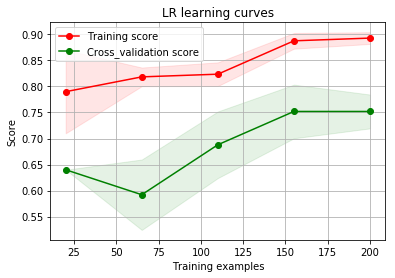

In [376]:
learningCurve3 = plot_learning_curve(log_p0, "LR learning curves", X_train_new, y_train, cv = StratifiedKFold(n_splits = 5))

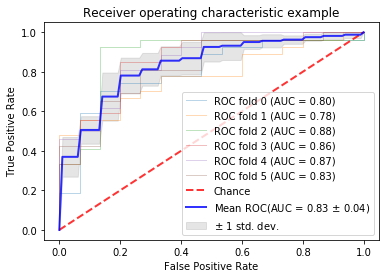

In [377]:
roc3 = plot_roc(log_p0,X_train_new)

In [378]:
log_p0.fit(X_train_new, y_train)
X_test_new = test[top_features]
log_pred3 = log_p0.predict_proba(X_test_new)[:,1]
submission1 = pd.DataFrame({'id':test['id'],
                          'target':log_pred3})
submission1.to_csv('submission1.csv', index = False)

In [379]:
X_test_new.head()

,33,65,199,101,226,24,176,30,17,201,...,80,108,194,189,258,295,73,117,91,217
0,1.988,-1.010,-0.298,1.464,0.540,0.183,-1.283,-1.003,0.764,-0.488,...,1.198,-0.639,-0.538,0.329,1.285,2.132,0.112,0.506,0.101,-0.904
1,0.543,-0.781,0.961,-0.981,0.476,0.475,-0.670,1.077,-2.107,-0.426,...,-0.421,0.649,-0.438,0.149,0.170,-1.133,-0.898,-1.386,1.216,0.953
2,-1.191,-0.529,0.329,0.266,-0.751,0.427,-1.331,-0.036,-1.039,-0.847,...,-1.030,1.119,0.463,-0.172,-1.134,0.701,-2.471,0.347,-1.104,-1.201
3,0.542,0.754,-0.336,0.321,-1.386,0.173,-1.506,-0.374,0.857,-1.032,...,0.560,-1.875,-1.613,0.871,0.322,0.916,-0.246,0.292,-1.649,1.502
4,0.635,-1.210,-2.235,-0.174,-1.592,1.130,2.212,0.794,0.006,1.718,...,-3.389,0.392,-0.815,0.752,2.169,0.322,-1.321,-0.081,-0.294,0.460


## Add new statistics.

In [380]:
train['mean'] = train.mean(1)
train['std'] = train.std(1)
test['mean'] = test.mean(1)
test['std'] = test.std(1)
X_train_add = train[top_features + ['mean']]
X_test_add = test[top_features + ['mean']]

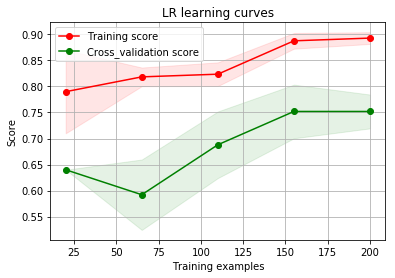

In [381]:
learningCurve4 = plot_learning_curve(log_p0, "LR learning curves", X_train_add, y_train, cv = StratifiedKFold(n_splits = 5))

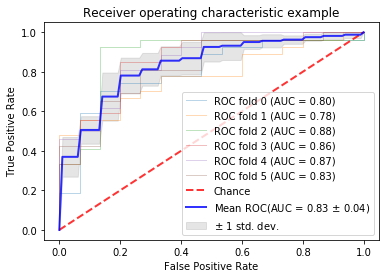

In [382]:
roc4 = plot_roc(log_p0,X_train_add)

In [383]:
log_p0.fit(X_train_add, y_train)
log_pred4 = log_p0.predict_proba(X_test_add)[:,1]
submission2 = pd.DataFrame({'id':test['id'],
                          'target':log_pred4})
submission2.to_csv('submission2.csv', index = False)

# Decison Tree

In [384]:
from sklearn.tree import DecisionTreeClassifier
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']
X_test = test.drop(['id'], axis = 1)
tree = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],
          'max_depth':[1,3,5,7,10],
         'class_weight': ['balanced', None]}
trees = GridSearchCV(tree, params, cv = StratifiedKFold(n_splits = 5), verbose = 1, n_jobs = -1, scoring = 'roc_auc')

trees.fit(X_train, y_train)

tree_best = trees.best_estimator_

print(tree_best)
print(trees.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.634375


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


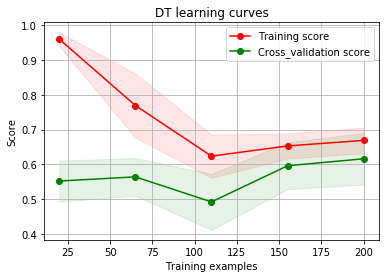

In [385]:
learningCurve5 = plot_learning_curve(tree_best, "DT learning curves", X_train_add, y_train, cv = StratifiedKFold(n_splits = 5))

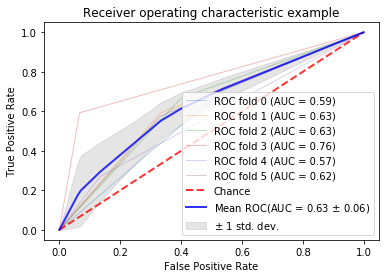

In [386]:
roc5 = plot_roc(tree_best,X_train_add)

Decision tree is not suitable for this dataset.

# Lasso Regression

In [387]:
from sklearn.linear_model import Lasso
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']
X_test = test.drop(['id'], axis = 1)
las = Lasso(alpha=0.031, tol=0.01, random_state=42, selection='random')

params = {
            'alpha' : [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
            'tol'   : [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]
        }
las_ss = GridSearchCV(las, params, cv = StratifiedKFold(n_splits = 5), verbose = 1, n_jobs = -1, scoring = 'roc_auc')

las_ss.fit(X_train, y_train)

las_best = las_ss.best_estimator_

print(las_ss)
print(las_ss.best_score_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=0.031, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='random', tol=0.01, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031], 'tol': [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)
0.8350694444444444


[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    0.6s finished


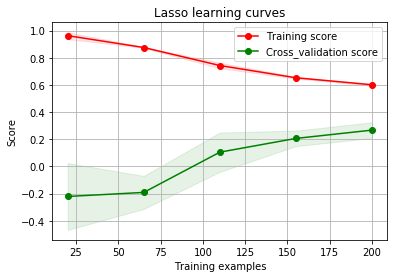

In [388]:
learningCurve6 = plot_learning_curve(las_best, "Lasso learning curves", X_train, y_train, cv = StratifiedKFold(n_splits = 5))

In [389]:
def plot_roc0(clf, X = X_train, y = y_train, n = 6):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    classifier = clf
    cv = StratifiedKFold(n_splits = n)
    for train, test in cv.split(X,y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr,tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw = 1, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle = '--', lw =2, color = 'r', label = 'Chance', alpha =.8)
    mean_tpr = np.mean(tprs, axis = 0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color = 'b', label = r'Mean ROC(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw =2, alpha = .8)
    std_tpr = np.std(tprs, axis = 0)
    tprs_upper = np.minimum(mean_tpr + std_tpr,1)
    tprs_lower = np.maximum(mean_tpr - std_tpr,0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color ='grey', alpha = 0.2, label = r'$\pm$ 1 std. dev.')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()

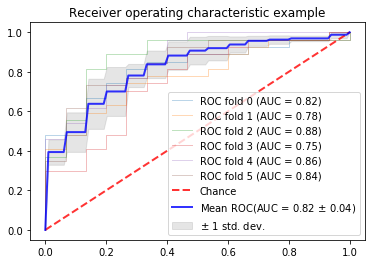

In [390]:
roc6 = plot_roc0(las_best,X_train)

In [391]:
las_best.fit(X_train_add, y_train)
las_best_pred = las_best.predict(X_test_add)
submission3 = pd.DataFrame({'id':test['id'],
                          'target':las_best_pred})
submission3.to_csv('submission3.csv', index = False)